In [33]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import os
import lightgbm as lgb

%matplotlib inline

OSError: dlopen(/anaconda3/lib/python3.6/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /anaconda3/lib/python3.6/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found

In [2]:
os.chdir('/Users/Daniel1020/Downloads/Loan')

In [3]:
borrower= pd.read_csv('borrower_table.csv')
loan= pd.read_csv('loan_table.csv',parse_dates=['date'])

In [17]:
borrower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101100 entries, 0 to 101099
Data columns (total 12 columns):
loan_id                                            101100 non-null int64
is_first_loan                                      101100 non-null int64
fully_repaid_previous_loans                        46153 non-null float64
currently_repaying_other_loans                     46153 non-null float64
total_credit_card_limit                            101100 non-null int64
avg_percentage_credit_card_limit_used_last_year    94128 non-null float64
saving_amount                                      101100 non-null int64
checking_amount                                    101100 non-null int64
is_employed                                        101100 non-null int64
yearly_salary                                      101100 non-null int64
age                                                101100 non-null int64
dependent_number                                   101100 non-null int64
dtypes: fl

In [20]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101100 entries, 0 to 101099
Data columns (total 5 columns):
loan_id         101100 non-null int64
loan_purpose    101100 non-null object
date            101100 non-null datetime64[ns]
loan_granted    101100 non-null int64
loan_repaid     47654 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 3.9+ MB


In [22]:
len(loan['loan_id'])

101100

In [23]:
len(borrower['loan_id'])

101100

# Data Processing

In [4]:
data = pd. merge(loan,borrower, how= 'left',on ='loan_id')

In [25]:
data.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,19454,investment,2012-03-15,0,NaN,1,NaN,NaN,8600,0.79,1491,6285,1,45200,42,7
1,496811,investment,2012-01-17,0,NaN,1,NaN,NaN,5300,0.52,141,5793,0,0,42,5
2,929493,other,2012-02-09,0,NaN,1,NaN,NaN,0,NaN,660,3232,1,26500,60,4
3,580653,other,2012-06-27,1,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
4,172419,business,2012-05-21,1,0.0,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4


In [5]:
data = data[data['loan_granted']==1]

In [6]:
count_na=data.isnull().sum()

In [7]:
count_na[count_na >0]

fully_repaid_previous_loans                        25789
currently_repaying_other_loans                     25789
avg_percentage_credit_card_limit_used_last_year      903
dtype: int64

In [8]:
data['month']=data['date'].apply(lambda x: x.month)
data['week'] = data['date'].apply(lambda x: x.week)
data['dayofweek'] = data['date'].apply(lambda x: x.dayofweek)

In [9]:
data = data.drop(labels=['loan_id','date','loan_granted'],axis=1,inplace=False)

In [32]:
data.head()

,loan_purpose,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,month,week,dayofweek
3,other,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4,6,26,2
4,business,0.0,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4,5,21,0
6,business,1.0,0,1.0,0.0,7800,0.30,4206,4368,1,51100,51,2,3,11,2
7,emergency_funds,0.0,0,0.0,1.0,4300,1.02,886,1597,1,15000,59,2,8,35,4
8,investment,1.0,0,1.0,0.0,3900,0.65,1837,3795,1,12000,24,1,5,21,4


## Visualization

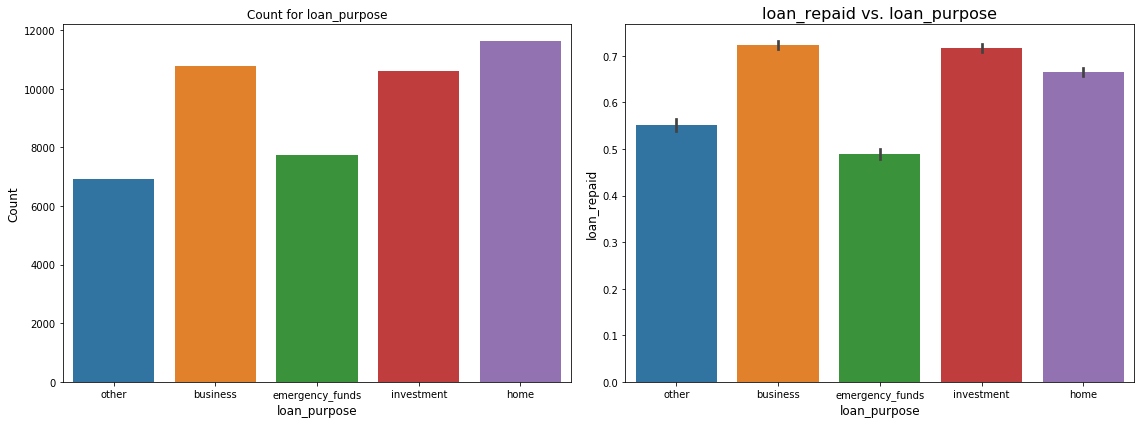

In [34]:
fig,ax= plt.subplots(ncols=2,nrows=1,figsize=(16,6))
sns.countplot(x = 'loan_purpose',data=data,ax=ax[0])
ax[0].set_xlabel('loan_purpose',fontsize=12)
ax[0].set_ylabel('Count',fontsize=12)
ax[0].set_title('Count for loan_purpose')

sns.barplot(x='loan_purpose',y='loan_repaid',data=data,ax=ax[1])
ax[1].set_xlabel('loan_purpose',fontsize=12)
ax[1].set_ylabel('loan_repaid',fontsize=12)
ax[1].set_title('loan_repaid vs. loan_purpose',fontsize=16)
plt.tight_layout()
plt.show()

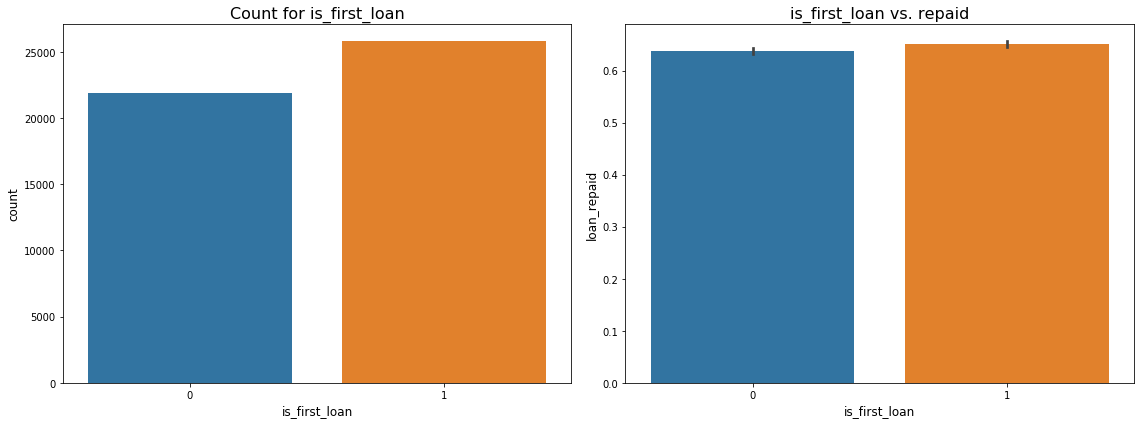

In [35]:
# visualization of is_first_loan

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,6))
sns.countplot(x='is_first_loan',data=data,ax=ax[0])
ax[0].set_xlabel('is_first_loan',fontsize=12)
ax[0].set_ylabel('count',fontsize=12)
ax[0].set_title('Count for is_first_loan',fontsize=16)

sns.barplot(x='is_first_loan',y='loan_repaid',data=data,ax=ax[1])
ax[1].set_xlabel('is_first_loan',fontsize=12)
ax[1].set_ylabel('loan_repaid',fontsize=12)
ax[1].set_title('is_first_loan vs. repaid',fontsize=16)
plt.tight_layout()
plt.show()

#### For these who are not their first loan actually have the same repaid , even though they take smaller proportion of the loans

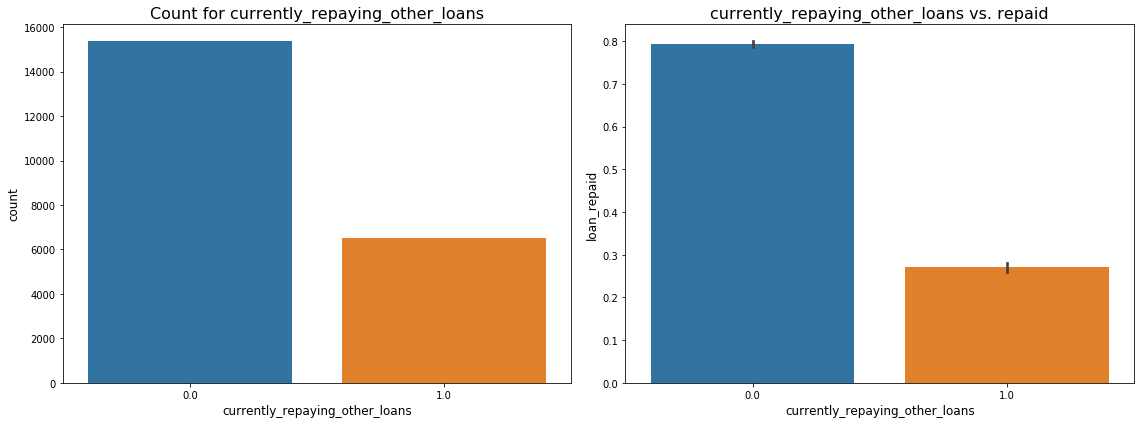

In [36]:
# Visualization of 'currently_repaying_other_loan'

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,6))
sns.countplot(x='currently_repaying_other_loans',data=data,ax=ax[0])
ax[0].set_xlabel('currently_repaying_other_loans',fontsize=12)
ax[0].set_ylabel('count',fontsize=12)
ax[0].set_title('Count for currently_repaying_other_loans',fontsize=16)

sns.barplot(x='currently_repaying_other_loans',y='loan_repaid',data=data,ax=ax[1])
ax[1].set_xlabel('currently_repaying_other_loans',fontsize=12)
ax[1].set_ylabel('loan_repaid',fontsize=12)
ax[1].set_title('currently_repaying_other_loans vs. repaid',fontsize=16)
plt.tight_layout()
plt.show()

In [37]:
#visualization of 'total_credit_card_limit'

grouped=data[['total_credit_card_limit','loan_repaid']].groupby('total_credit_card_limit')
mean=grouped.mean().reset_index()

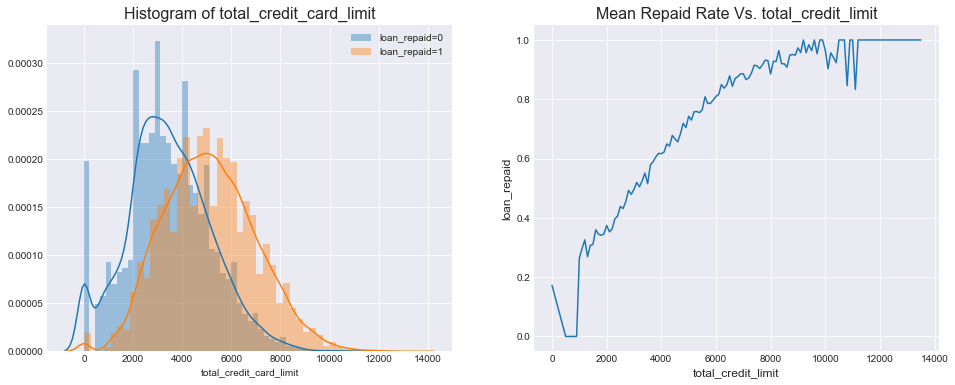

In [51]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,6))

sns.distplot(data[data['loan_repaid']==0]['total_credit_card_limit'],
            label='loan_repaid=0',ax=ax[0])
sns.distplot(data[data['loan_repaid']==1]['total_credit_card_limit'],
            label='loan_repaid=1',ax=ax[0])
ax[0].set_title('Histogram of total_credit_card_limit',fontsize=16)
ax[0].legend()

sns.set_style('darkgrid')
ax[1].plot(mean['total_credit_card_limit'],mean['loan_repaid'])
ax[1].set_xlabel('total_credit_limit',fontsize=12)
ax[1].set_ylabel('loan_repaid',fontsize=12)
ax[1].set_title('Mean Repaid Rate Vs. total_credit_limit',fontsize=16)
plt.show()


In [56]:
# visualization of 'avg_percentage_credit_card_limit_used_last_year'

not_null = data[~data['avg_percentage_credit_card_limit_used_last_year'].isnull()]
grouped = not_null.groupby('avg_percentage_credit_card_limit_used_last_year')
mean = grouped.mean().reset_index()

In [58]:
not_null.head()

,loan_purpose,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,month,week,dayofweek
3,other,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4,6,26,2
4,business,0.0,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4,5,21,0
6,business,1.0,0,1.0,0.0,7800,0.30,4206,4368,1,51100,51,2,3,11,2
7,emergency_funds,0.0,0,0.0,1.0,4300,1.02,886,1597,1,15000,59,2,8,35,4
8,investment,1.0,0,1.0,0.0,3900,0.65,1837,3795,1,12000,24,1,5,21,4


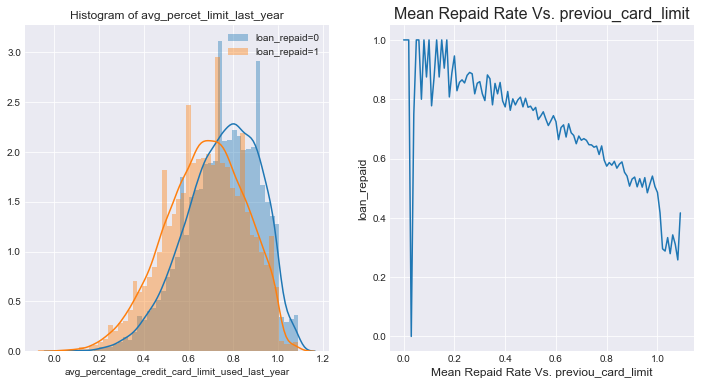

In [62]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,6))
target_0= not_null[not_null['loan_repaid']==0]
target_1= not_null[not_null['loan_repaid']==1]
sns.distplot(target_0['avg_percentage_credit_card_limit_used_last_year'],
            label='loan_repaid=0',ax=ax[0])
sns.distplot(target_1['avg_percentage_credit_card_limit_used_last_year'],
            label='loan_repaid=1',ax=ax[0])
ax[0].set_title('Histogram of avg_percet_limit_last_year')
ax[0].legend()


sns.set_style('darkgrid')
ax[1].plot(mean['avg_percentage_credit_card_limit_used_last_year'],mean['loan_repaid'])
ax[1].set_xlabel('Mean Repaid Rate Vs. previou_card_limit',fontsize=12)
ax[1].set_ylabel('loan_repaid',fontsize=12)
ax[1].set_title('Mean Repaid Rate Vs. previou_card_limit',fontsize=16)
plt.show()


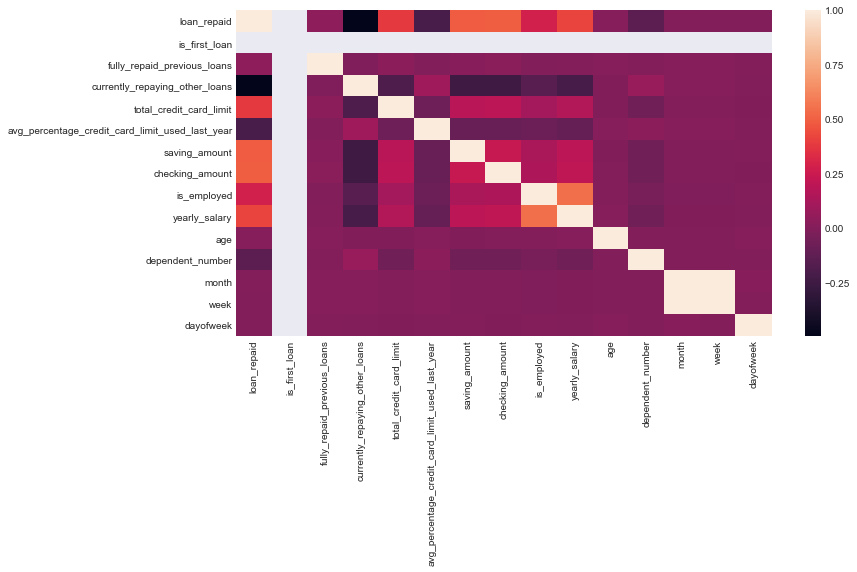

In [63]:
# feature correlation

fig,ax=plt.subplots(figsize=(12,6))
sns.heatmap(data.dropna(axis=0,how='any').corr(),ax=ax)
plt.show()


In [64]:
data.head()

,loan_purpose,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,month,week,dayofweek
3,other,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4,6,26,2
4,business,0.0,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4,5,21,0
6,business,1.0,0,1.0,0.0,7800,0.30,4206,4368,1,51100,51,2,3,11,2
7,emergency_funds,0.0,0,0.0,1.0,4300,1.02,886,1597,1,15000,59,2,8,35,4
8,investment,1.0,0,1.0,0.0,3900,0.65,1837,3795,1,12000,24,1,5,21,4


# Feature Engineering

In [12]:
print (data[data['is_first_loan']==1]['fully_repaid_previous_loans'].unique())
print (data[data['is_first_loan']==1]['currently_repaying_other_loans'].unique())

[nan]
[nan]


In [13]:
data = data.fillna({'fully_repaid_previous_loans': -1,'currently_repaying_other_loans': -1})

In [14]:
median =data['avg_percentage_credit_card_limit_used_last_year'].median()

In [15]:
median

0.71

In [16]:
data = data.fillna({'avg_percentage_credit_card_limit_used_last_year':median})

In [17]:
data = data.drop(labels=['month','week','dayofweek'],axis=1,inplace=False)

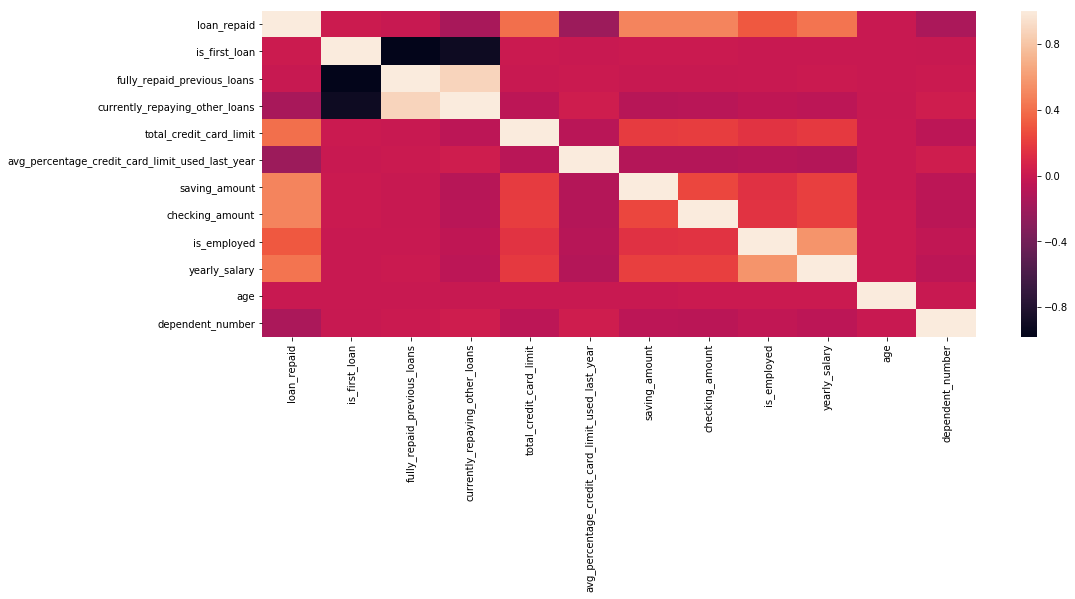

In [18]:
fig,ax=plt.subplots(figsize=(16,6))
sns.heatmap(data.corr(),ax=ax)
plt.show()

# Machine Learning

In [19]:
# encoding 'loan_purpose'
encoder = LabelEncoder()
data['loan_purpose']=encoder.fit_transform(data['loan_purpose'])

In [21]:
# define categorical features

categorical_feature =['loan_purpose','is_first_loan','fully_repaid_previous_loans',
                     'currently_repaying_other_loans','is_employed']
target = 'loan_repaid'

data[categorical_feature]=data[categorical_feature].astype('category')
data[target]=data[target].astype('category')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47654 entries, 3 to 101098
Data columns (total 13 columns):
loan_purpose                                       47654 non-null category
loan_repaid                                        47654 non-null category
is_first_loan                                      47654 non-null category
fully_repaid_previous_loans                        47654 non-null category
currently_repaying_other_loans                     47654 non-null category
total_credit_card_limit                            47654 non-null int64
avg_percentage_credit_card_limit_used_last_year    47654 non-null float64
saving_amount                                      47654 non-null int64
checking_amount                                    47654 non-null int64
is_employed                                        47654 non-null category
yearly_salary                                      47654 non-null int64
age                                                47654 non-null int64
depend

In [23]:
# split into traing and test data set
x= data.drop('loan_repaid',axis=1)
y= data['loan_repaid']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,stratify=y,random_state=42)

In [29]:
# create lightGBM dataset
d_train = lgb.Dataset(data=x_train,label=y_train,categorical_feature=categorical_feature,
                     free_raw_data=False)

NameError: name 'lgb' is not defined